# Assignment 5 Solutions

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Question 1

In an experiment to compare the tensile strengths of I = 4 different types of copper wire, J = 3 samples of each type were used. The between-samples and within-samples estimates of σ2 were computed as MSTr = 2679.5 and MSE = 1098.2, respectively.

(a) Use the F test at level .05 to test Ho: μ1 = μ2 = . . . = μ4 versus Ha: at least two μi's are unequal. (Give answers accurate to 2 decimal places.)

(b) What can be said about the P-value for the test?

In [3]:
a = 4
n = 3

N = a*n
dof_total = N - 1
dof_treatment = a - 1
dof_error = dof_total - dof_treatment

MS_treatment = 2679.5
MS_error = 1098.2

fSN = MS_treatment/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(dof_treatment,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

F Signal/Noise = 2.44 
Critical F-value = 4.07
Pvalue = 0.139


# Question 2

An article describes an experiment in which several types of boxes were compared with respect to compression strength (lb). The table below presents the results of a single-factor ANOVA experiment involving I = 4 types of boxes.

Type of Box  	Compression Strength (lb) 
1 655.5   788.3   734.3  721.4  679.1  699.4  

2
789.2
772.5
786.9
686.1
732.1
774.8

3
737.1
639.0
696.3
671.7
717.2
727.1

4
535.1
628.7
542.4
559.0
586.9
520.0

Suppose that the compression strength observations on the fourth type of box had been 645.1, 738.7, 652.4, 669.0, 696.9, 630.0 (obtained by adding 110 to each previous x4j). Assuming no change in the remaining observations, carry out an F test with α = .05. (Give F to 2 decimal places and the p-value to 3 decimal places.)

In [8]:
groupA = np.array([655.5,788.3,734.3,721.4,679.1,699.4])
groupB = np.array([789.2,772.5,786.9,686.1,732.1,774.8])
groupC = np.array([737.1,639.0,696.3,671.7,717.2,727.1])
groupD = np.array([645.1,738.7,652.4,669.0,696.9,630.0])

a = 4
n = 6

idA = np.ones(n)
idB = 2.0*np.ones(n)
idC = 3.0*np.ones(n)
idD = 4.0*np.ones(n)

data = np.concatenate([groupA,groupB,groupC,groupD])
id = np.concatenate([idA,idB,idC,idD])

data2 = np.transpose(np.vstack((data,id)))

print (data2)

import pandas as pd

df = pd.DataFrame(data2,columns=['value','treatment'])

df.head(100)

[[655.5   1. ]
 [788.3   1. ]
 [734.3   1. ]
 [721.4   1. ]
 [679.1   1. ]
 [699.4   1. ]
 [789.2   2. ]
 [772.5   2. ]
 [786.9   2. ]
 [686.1   2. ]
 [732.1   2. ]
 [774.8   2. ]
 [737.1   3. ]
 [639.    3. ]
 [696.3   3. ]
 [671.7   3. ]
 [717.2   3. ]
 [727.1   3. ]
 [645.1   4. ]
 [738.7   4. ]
 [652.4   4. ]
 [669.    4. ]
 [696.9   4. ]
 [630.    4. ]]


,value,treatment
0,655.5,1.0
1,788.3,1.0
2,734.3,1.0
3,721.4,1.0
4,679.1,1.0
5,699.4,1.0
6,789.2,2.0
7,772.5,2.0
8,786.9,2.0
9,686.1,2.0


In [9]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('value ~ C(treatment)',df).fit()
anovaResults = anova_lm(model)

print (anovaResults)

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   3.0  22781.254583  7593.751528  4.488169  0.014517
Residual      20.0  33838.975000  1691.948750       NaN       NaN


# Question 3

The lumen output was determined for each of I = 3 different brands of 60-watt soft-white lightbulbs, with J = 9 bulbs of each brand tested. The sums of squares were computed as SSE = 4775.3 and SSTr = 594.4. State the hypotheses of interest (including word definitions of parameters).

Use the F test of ANOVA (α = .05) to decide whether there are any differences in true average lumen outputs among the three brands for this type of bulb by obtaining as much information as possible about the P-value. (Give answers accurate to 2 decimal places.)

In [4]:
a = 3
n = 9

N = a*n
dof_total = N - 1
dof_treatment = a - 1
dof_error = dof_total - dof_treatment

SS_treatment = 594.4
SS_error = 4775.3

MS_treatment = SS_treatment/dof_treatment
MS_error = SS_error/dof_error

fSN = MS_treatment/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(dof_treatment,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

F Signal/Noise = 1.49 
Critical F-value = 3.40
Pvalue = 0.245


# Question 4

In a study to assess the effects of malaria infection on mosquito hosts, mosquitos were fed on either infective or noninfective rhesus monkeys. Subsequently the distance they flew during a 24-hour period was measured using a flight mill. The mosquitos were divided into four groups of eight mosquitos each: infective rhesus and sporozites present (IRS), infective rhesus and oocysts present (IRD), infective rhesus and no infection developed (IRN), and noninfective (C). The summary data values are x1. = 4.28 (IRS), x2. = 4.81 (IRD), x3. = 5.39 (IRN), x4. = 5.88 (C), x.. = 5.09, ΣΣxij 2 = 955.6192. Use the ANOVA F test at level .05 to decide whether there are any differences between true average flight times for the four treatments. (Give answers accurate to 2 decimal places.)

This question involves the use of summary statistics, which is very typically when looking at published papers. Rather than giving all of the raw data, they give the averages of each group, the number of groups and the number of samples within each group, and one extra quantity - $\sum_i \sum_j {x_{ij}^2}$.

With these quantities, we can find all of the necessary quantities for carrying out 
a typical one-way ANOVA!

$SS_{total} = \sum_{i=1}^{a} \sum_{j=1}^{n} {(x_{ij}-\bar{\bar{x}})^2}$


$SS_{total} = \sum_{i=1}^{a} \sum_{j=1}^{n} {(x_{ij}^2-2x_{ij}\bar{\bar{x}} + \bar{\bar{x}}^2)}$

$SS_{total} = \sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ij}^2} -2\bar{\bar{x}}\sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ij}} + \bar{\bar{x}}^2 \sum_{i=1}^{a} \sum_{j=1}^{n} {1}$

From here, we know that:

$\sum_{i=1}^{a} \sum_{j=1}^{n} {1} = N$

and

$\sum_{j=1}^{n} {x_{ij}} = N \bar{\bar{x}}$

and therefore:

$SS_{total} = \sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ij}^2} - N \bar{\bar{x}}^2$

We also know that:

$SS_{treatment} = \sum_{i=1}^{a} n(\bar{x}_i - \bar{\bar{x}})^2$

and

$SS_{error} = SS_{total} - SS_{treatment}$

In [4]:
a = 4
n = 8

# calculate DOF's
N = a*n
dof_total = N - 1
dof_treatment = a - 1
dof_error = dof_total - dof_treatment

# summary data for xbar
#xbar = np.array([4.28,4.81,5.39,5.88])
xbar = np.array([4.80,4.30,5.19,6.26])
xbarbar = xbar.mean()

# calculate SS_treatment
SS_treatment = 0.0
for x in xbar:
    SS_treatment += n*(x-xbarbar)**2
    
# calculate SS_total and SS_error
#sumxij2 = 955.6192
sumxij2 = 1044.525
SS_total = sumxij2-N*xbarbar**2
SS_error = SS_total-SS_treatment

# Proceed with normal ANOVA from here
MS_treatment = SS_treatment/dof_treatment
MS_error = SS_error/dof_error

fSN = MS_treatment/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(dof_treatment,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

F Signal/Noise = 0.85 
Critical F-value = 2.95
Pvalue = 0.520


# Question 5

The following data was reported on total Fe for four types of iron formation (1 = carbonate, 2 = silicate, 3 = magnetite, 4 = hematite).

1:
20.3
28.1
27.8
27.0
27.7
25.2
25.3
27.1
20.5
31.2

2:
26.9
24.0
26.2
20.2
24.3
34.0
17.1
26.8
23.7
25.0

3:
29.7
34.0
27.5
29.4
27.5
26.2
29.9
29.5
30.0
35.7

4:
36.3
44.2
34.1
30.3
31.2
33.1
34.1
32.9
36.3
25.1

Carry out an analysis of variance F test at significance level .01, and summarize the results in an ANOVA table. (Give answers accurate to 1 decimal place.)

In [6]:
groupA = np.array([20.3,28.1,27.8,27.0,27.7,25.2,25.3,27.1,20.5,31.2])
groupB = np.array([26.9,24.0,26.2,20.2,24.3,34.0,17.1,26.8,23.7,25.0])
groupC = np.array([29.7,34.0,27.5,29.4,27.5,26.2,29.9,29.5,30.0,35.7])
groupD = np.array([36.3,44.2,34.1,30.3,31.2,33.1,34.1,32.9,36.3,25.1])

a = 4
n = 10

idA = np.ones(n)
idB = 2.0*np.ones(n)
idC = 3.0*np.ones(n)
idD = 4.0*np.ones(n)

data = np.concatenate([groupA,groupB,groupC,groupD])
id = np.concatenate([idA,idB,idC,idD])

data2 = np.transpose(np.vstack((data,id)))

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(data2,columns=['value','treatment'])
model = ols('value ~ C(treatment)',df).fit()
anovaResults = anova_lm(model)

print (anovaResults)

                df   sum_sq     mean_sq          F    PR(>F)
C(treatment)   3.0  493.611  164.537000  10.316159  0.000048
Residual      36.0  574.180   15.949444        NaN       NaN


# Question 6

A study of the properties of metal plate-connected trusses used for roof support yielded the following observations on axial stiffness index (kips/in.) for plate lengths 4, 6, 8, 10, and 12 in.

4:
342.3
409.5
311.0
326.5
316.8
349.8
309.7

6:
350.4
347.2
361.0
404.5
331.0
348.9
381.7

8:
384.0
366.2
351.0
357.1
409.9
367.3
382.0

10:
404.4
452.9
461.4
433.1
410.6
384.2
362.6

12:
454.0
441.8
419.9
410.7
473.4
441.2
465.8

Does variation in plate length have any effect on true average axial stiffness? State and test the relevant hypotheses using analysis of variance with α = .01. Display your results in an ANOVA table. (Round answers to whole numbers and F to 2 decimal places)

In [7]:
groupA = np.array([342.3,409.5,311.0,326.5,316.8,349.8,309.7])
groupB = np.array([350.4,347.2,361.0,404.5,331.0,348.9,381.7])
groupC = np.array([384.0,366.2,351.0,357.1,409.9,367.3,382.0])
groupD = np.array([404.4,452.9,461.4,433.1,410.6,384.2,362.6])
groupE = np.array([454.0,441.8,419.9,410.7,473.4,441.2,465.8])

a = 5
n = 7

idA = 4*np.ones(n)
idB = 6*np.ones(n)
idC = 8*np.ones(n)
idD = 10*np.ones(n)
idE = 12*np.ones(n)

data = np.concatenate([groupA,groupB,groupC,groupD,groupE])
id = np.concatenate([idA,idB,idC,idD,idE])

data2 = np.transpose(np.vstack((data,id)))

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(data2,columns=['value','treatment'])
model = ols('value ~ C(treatment)',df).fit()
anovaResults = anova_lm(model)

print (anovaResults)

                df        sum_sq       mean_sq          F        PR(>F)
C(treatment)   4.0  51213.898857  12803.474714  15.802727  4.602120e-07
Residual      30.0  24306.200000    810.206667        NaN           NaN


# Question 7

In an experiment to investigate the performance of four different brands of spark plugs intended for use on a 125-cc two-stroke motorcycle, five plugs of each brand were tested and the number of miles (at a constant speed) until failure was observed. The partial ANOVA table for the data is given here. Fill in the missing entries, state the relevant hypotheses, and carry out a test by obtaining as much information as you can about the P-value. (Use α = 0.05.)

In [8]:
a = 4
n = 5

N = a*n
dof_total = N - 1
dof_treatment = a - 1
dof_error = dof_total - dof_treatment

SS_total = 310471.12
MS_error = 14827.07

SS_error = MS_error*dof_error

SS_treatment = SS_total - SS_error
MS_treatment = SS_treatment/dof_treatment

fSN = MS_treatment/MS_error

alpha = 0.05

fdist = stats.f(dof_treatment,dof_error)
fhigh = fdist.ppf(1-alpha)

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)

# print table

print ("Source     df     Sum of Squares     Mean Square     f     P-value")
print ("Groups     %0.0f       %0.2f           %0.2f       %0.2f    %0.3f" %(dof_treatment,SS_treatment,MS_treatment,fSN,pvalue))
print ("Error      %0.0f      %0.2f          %0.2f" %(dof_error,SS_error,MS_error))
print ("Total      %0.0f      %0.2f" %(dof_total,SS_total))


Source     df     Sum of Squares     Mean Square     f     P-value
Groups     3       73238.00           24412.67       1.65    0.218
Error      16      237233.12          14827.07
Total      19      310471.12


# Question 8

Six samples of each of four types of cereal grain grown in a certain region were analyzed to determine thiamin content, resulting in the following data (μg/g).

Wheat	  6.5  	  6.1  	  5.5  	  5.9  	  6.3  	  5.4 

Barley  	7.6	7.9	7.6	7.9	7.0	6.0

Maize	6.3	5.9	4.9	4.9	4.9	5.5

Oats	7.9	8.2	6.0	6.6	8.0	6.7

Does this data suggest that at least two of the grains differ with respect to true average thiamin content? Use a level α = .05 test based on the P-value method. (Give F to 2 decimal places and the P-value to 3 decimal places.)

In [9]:
groupA = np.array([6.5,6.1,5.5,5.9,6.3,5.4])
groupB = np.array([7.6,7.9,7.6,7.9,7.0,6.0])
groupC = np.array([6.3,5.9,4.9,4.9,4.9,5.5])
groupD = np.array([7.9,8.2,6.0,6.6,8.0,6.7])

a = 4
n = 6

idA = np.ones(n)
idB = 2.0*np.ones(n)
idC = 3.0*np.ones(n)
idD = 4.0*np.ones(n)

data = np.concatenate([groupA,groupB,groupC,groupD])
id = np.concatenate([idA,idB,idC,idD])

data2 = np.transpose(np.vstack((data,id)))

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(data2,columns=['value','treatment'])
model = ols('value ~ C(treatment)',df).fit()
anovaResults = anova_lm(model)

print (anovaResults)

                df     sum_sq   mean_sq          F    PR(>F)
C(treatment)   3.0  16.457917  5.485972  11.403372  0.000141
Residual      20.0   9.621667  0.481083        NaN       NaN


# Question 9

An experiment to compare the spreading rates of five different brands of yellow interior latex paint available in a particular area used 4 gallons (J = 4) of each paint. The sample average spreading rates (ft2/gal) for the five brands were x1. = 462.0, x2. = 512.8, x3. = 437.5, x4. = 469.3, and x5. = 532.1. The computer value of F was found to be significant at level α = .05. With MSE = 272.8, use Tukey's procedure to investigate significant differences between brands. (Give answer accurate to 1 decimal place.)

Python statsmodels has a package for performing Tukey's HSD test, but it requires the RAW data!  So, we are going to have to do this by hand for this question using the summary data instead.

In [6]:
a = 5
n = 4

# calculate DOF's
N = a*n
dof_total = N - 1
dof_treatment = a - 1
dof_error = dof_total - dof_treatment
print (dof_error)

# summary data for xbar
xbar = np.array([462.0,512.8,437.5,469.3,532.1])
xbarbar = xbar.mean()

# calculate SS_treatment
SS_treatment = 0.0
for x in xbar:
    SS_treatment += n*(x-xbarbar)**2
    
MS_treatment = SS_treatment/dof_treatment
    
MS_error = 272.8
SS_error = MS_error*dof_error

fSN = MS_treatment/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(dof_treatment,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

15
F Signal/Noise = 21.98 
Critical F-value = 3.06
Pvalue = 0.000


Standard Error = 8.258
Original Xbar =  [437.5 462.  469.3 512.8 532.1]
Sorted Xbar =  [437.5 462.  469.3 512.8 532.1]
q_tukey: calculating k =  2
q_critical =  3.0004658891872937
q_tukey: calculating k =  3
q_critical =  3.671883590240155
q_tukey: calculating k =  4
q_critical =  4.074474015068791
q_tukey: calculating k =  5
q_critical =  4.365484984832646
[3.00046589 3.67188359 4.07447402 4.36548498]
W = 36.1
[437.5, 462.0, 469.3, 512.8, 532.1]
i j xbar1 xbar2 Diff Diff_comp Result
1 2 437.5 462.0 2.967  3.000 No
1 3 437.5 469.3 3.851  3.672 Yes
1 4 437.5 512.8 9.118  4.074 Yes
1 5 437.5 532.1 11.455  4.365 Yes
2 3 462.0 469.3 0.884  3.000 No
2 4 462.0 512.8 6.151  3.672 Yes
2 5 462.0 532.1 8.488  4.074 Yes
3 4 469.3 512.8 5.267  3.000 Yes
3 5 469.3 532.1 7.604  3.672 Yes
4 5 512.8 532.1 2.337  3.000 No


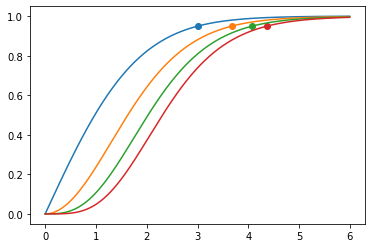

In [8]:
# Tukey's Procedure
#
# Step 1:  Calculate the standard error = sqrt(MS_error/n)

from q_tukey import q_tukey

std_error = np.sqrt(MS_error/n)
print ("Standard Error = %0.3f" % std_error)

# Step 2:  Order the means from smallest to largest

print ("Original Xbar = ",xbar)
xbar_orig = xbar.copy()
xbar.sort()
print ("Sorted Xbar = ",xbar)

# Step 3:  Get the expected number of error bars (sem) between largest and smallest, for the number
# of means to be compared (a).  For this, we need the studentized range table values q(alpha,dof_error,k) for k=2..a.
# 
# http://www.real-statistics.com/statistics-tables/studentized-range-q-table/
# For this problem, dof_error = 15, alpha = 0.05, k = 2,3,4,5
#q = np.array([3.014,3.673,4.076,4.367])

n_means=len(xbar)
q = q_tukey(n_means,dof_error,alpha)
print (q)

# Step 4:  Calculate W = q(k=5)*std_error

W = q[n_means-2]*std_error

print ("W = %0.1f" % W)

# Step 5:  Make pair-wise comparisons

print (list(xbar_orig))

print ("i j xbar1 xbar2 Diff Diff_comp Result")
for i in range(len(xbar)):
    for j in range(len(xbar)):
        if (xbar[j] > xbar[i]):
            diff = (xbar[j] - xbar[i])/std_error
            diff_comp = q[j-i-1]
            if (diff>diff_comp):
                Result = "Yes"
            else:
                Result = "No"
            iorig = list(xbar_orig).index(xbar[i])+1
            jorig = list(xbar_orig).index(xbar[j])+1
            print ("%0.0f %0.0f %0.1f %0.1f %0.3f  %0.3f %s" % (iorig,jorig,xbar[i],xbar[j],diff,diff_comp,Result))

# Question 10

In a study to assess the effects of malaria infection on mosquito hosts, mosquitos were fed on either infective or noninfective rhesus monkeys. Subsequently the distance they flew during a 24-hour period was measured using a flight mill. The mosquitos were divided into four groups of eight mosquitos each: infective rhesus and sporozites present (IRS), infective rhesus and oocysts present (IRD), infective rhesus and no infection developed (IRN), and noninfective (C). The summary data values are x1. = 4.39 (IRS), x2. = 4.52 (IRD), x3. = 5.49 (IRN), x4. = 6.36 (C), x.. = 5.19, ΣΣx2ij = 911.91. Use Tukey's procedure to identify differences in true average flight times among the four types of mosquitos. (Give answer accurate to 1 decimal place. Use α = 0.05.)

In this question, we have a similar situation to Question 9.  We have only the summary statistics to work from, and so must perform Tukey's HSD test through direct calculations.

In [2]:
a = 4
n = 8

# calculate DOF's
N = a*n
dof_total = N - 1
dof_treatment = a - 1
dof_error = dof_total - dof_treatment
print (dof_error)

# summary data for xbar
xbar = np.array([4.39,4.52,5.49,6.36])
xbarbar = xbar.mean()

# calculate SS_treatment
SS_treatment = 0.0
for x in xbar:
    SS_treatment += n*(x-xbarbar)**2
    
MS_treatment = SS_treatment/dof_treatment

sumxij2 = 911.91

SS_total = sumxij2 - N*xbarbar**2
    
SS_error = SS_total - SS_treatment
MS_error = SS_error/dof_error

fSN = MS_treatment/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(dof_treatment,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

28
F Signal/Noise = 6.43 
Critical F-value = 2.95
Pvalue = 0.002


Standard Error = 0.363
Original Xbar =  [4.39 4.52 5.49 6.36]
Sorted Xbar =  [4.39 4.52 5.49 6.36]
q_tukey: calculating k =  2
q_critical =  2.884108189097326
q_tukey: calculating k =  3
q_critical =  3.4977650373210802
q_tukey: calculating k =  4
q_critical =  3.859744662359969
[2.88410819 3.49776504 3.85974466]
W = 1.4
[4.39, 4.52, 5.49, 6.36]
i j xbar1 xbar2 Diff Diff_comp Result
1 2 4.39 4.52 0.358  2.884 No Difference
1 3 4.39 5.49 3.027  3.498 No Difference
1 4 4.39 6.36 5.422  3.860 Yes - Difference
2 3 4.52 5.49 2.670  2.884 No Difference
2 4 4.52 6.36 5.064  3.498 Yes - Difference
3 4 5.49 6.36 2.394  2.884 No Difference


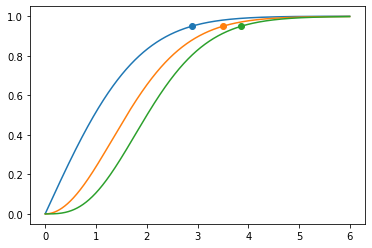

In [5]:
# Tukey's Procedure
#
# Step 1:  Calculate the standard error = sqrt(MS_error/n)

from q_tukey import q_tukey

std_error = np.sqrt(MS_error/n)
print ("Standard Error = %0.3f" % std_error)

# Step 2:  Order the means from smallest to largest

print ("Original Xbar = ",xbar)
xbar_orig = xbar.copy()
xbar.sort()
print ("Sorted Xbar = ",xbar)

# Step 3:  Get the expected number of error bars (sem) between largest and smallest, for the number
# of means to be compared (a).  For this, we need the studentized range table values q(alpha,dof_error,k) for k=2..a.
# 
# http://www.real-statistics.com/statistics-tables/studentized-range-q-table/
# For this problem, dof_error = 28, alpha = 0.05, k = 2,3,4
# q = np.array([2.897,3.499,3.861])

n_means=len(xbar)
q = q_tukey(n_means,dof_error,alpha)
print (q)

# Step 4:  Calculate W = q(k=5)*std_error

W = q[n_means-2]*std_error

print ("W = %0.1f" % W)

# Step 5:  Make pair-wise comparisons

print (list(xbar_orig))

print ("i j xbar1 xbar2 Diff Diff_comp Result")
for i in range(len(xbar)):
    for j in range(len(xbar)):
        if (xbar[j] > xbar[i]):
            diff = (xbar[j] - xbar[i])/std_error
            diff_comp = q[j-i-1]
            if (diff>diff_comp):
                Result = "Yes - Difference"
            else:
                Result = "No Difference"
            iorig = list(xbar_orig).index(xbar[i])+1
            jorig = list(xbar_orig).index(xbar[j])+1
            print ("%0.0f %0.0f %0.2f %0.2f %0.3f  %0.3f %s" % (iorig,jorig,xbar[i],xbar[j],diff,diff_comp,Result))